<a href="https://colab.research.google.com/github/MARIACLARACFBRITO/Estatistica-e-uso-do-python/blob/develop/An%C3%A1lise%20Combinat%C3%B3ria/ExercicioProbabilidade.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [72]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [73]:
import math
from itertools import (product,permutations,combinations,
                        combinations_with_replacement)
from scipy.stats import binom

In [74]:
#Exercício proposto
#eu tenho 5 entrevistas de emprego
#minha probabilidade de sucesso é 0.8
#quais são as chances que eu tenho de passar em pelo menos uma delas

In [75]:
#vou colocar um input para que a pessoa possa colocar quantas 'entrevistas ela quiser. E dessa forma os códigos vão atuar de acordo com o número de 'entrevistas ' desejado
resposta='S'

In [76]:
lista=[]

In [77]:
while resposta=='S':
    entrevista=(input("Digite o nome das empresas cujas entrevistas foram agendadas: "))
    lista.append(entrevista)
    resposta=input('Deseja acrescentar mais alguma empresa na a lista? EM caso afirmativo, digite "S".').upper()

Digite o nome das empresas cujas entrevistas foram agendadas: gatorade
Deseja acrescentar mais alguma empresa na a lista? EM caso afirmativo, digite "S".s
Digite o nome das empresas cujas entrevistas foram agendadas: nike
Deseja acrescentar mais alguma empresa na a lista? EM caso afirmativo, digite "S".s
Digite o nome das empresas cujas entrevistas foram agendadas: addidas
Deseja acrescentar mais alguma empresa na a lista? EM caso afirmativo, digite "S".n


In [78]:
lista

['gatorade', 'nike', 'addidas']

In [79]:
 #função para calcular o número de combinações possíveis
 #n=número de entrevistas
 #k=quantidade de sucessos
 def fazer_combinacao(n,k,rep=True):
   if rep==True:
    return math.factorial(n+k-1)/(math.factorial(k)*math.factorial(n-1))
   else:
     return math.factorial(n)/(math.factorial(k)*math.factorial(n-k))

In [80]:
#o indice serve para calcular cada sucesso desde 0 até o máximo de 'entrevistas'. Se houverem 3 entrevistas o parâmetro 'indice' vai se alterar de acordo.
for indice in range(len(lista)+1):
   print(f'As combinações possíveis caso você passe em {indice} entrevistas: {fazer_combinacao(len(lista),indice,False)}')

As combinações possíveis caso você passe em 0 entrevistas: 1.0
As combinações possíveis caso você passe em 1 entrevistas: 3.0
As combinações possíveis caso você passe em 2 entrevistas: 3.0
As combinações possíveis caso você passe em 3 entrevistas: 1.0


In [81]:
#p=probabilidade isolada de você passar em alguma entrevista -> para esse caso suponhamos que
#a probabilidade de você passar em alguma entrevista seja 0,8
#k=numero de sucessos
# n=numero total de entrevistas
def calcula_prob (p,k,n):
   return (p**k*((1-p)**(n-k)))



In [82]:
for indice in range(0,len(lista)+1):
  print(f'A probabilidade para {indice} sucessos é: {calcula_prob(0.8,indice,len(lista))}')


A probabilidade para 0 sucessos é: 0.007999999999999995
A probabilidade para 1 sucessos é: 0.03199999999999999
A probabilidade para 2 sucessos é: 0.128
A probabilidade para 3 sucessos é: 0.5120000000000001


In [83]:
for indice in range(0,len(lista)+1):
  print(f'As distribuições de probabilidades para {indice} sucessos é:  {fazer_combinacao(len(lista),indice,False)*calcula_prob(0.8,indice,len(lista))}')

As distribuições de probabilidades para 0 sucessos é:  0.007999999999999995
As distribuições de probabilidades para 1 sucessos é:  0.09599999999999996
As distribuições de probabilidades para 2 sucessos é:  0.384
As distribuições de probabilidades para 3 sucessos é:  0.5120000000000001


In [85]:
#agora quero verificar qual a probabilidade de eu passar entre 2 a 4 entrevistas:
#Agora basta somar as distribuições de probabilidade desejadas:
prob=[]
n=range(int(input('Primeiro número: ')),int(input('Segundo número: ')))
for indice in n:
 probabilidade_desejada=(fazer_combinacao(len(lista),indice,False)*calcula_prob(0.8,indice,len(lista)))
 prob.append(probabilidade_desejada)

Primeiro número: 1
Segundo número: 2


In [86]:
prob

[0.09599999999999996]

In [87]:
#a probabilidade de eu ser aprovada em 2 a 4 entrevistas é:
sum(prob)

0.09599999999999996


##Desenhar o gráfico de distribuição de probabilidade

In [92]:
p=0.8

In [90]:
n_sucesso=range(len(lista)+1)

In [91]:
probabilidades=binom.pmf(p=p, n=len(lista), k= n_sucesso)

In [93]:
df_probabilidade=pd.DataFrame(n_sucesso, columns=['sucesso'])

In [94]:
df_probabilidade['probabilidade']=probabilidades

Text(0.5, 1.0, 'Distribuição de probabilidades de 3 tentantivas e 80.0% de sucesso')

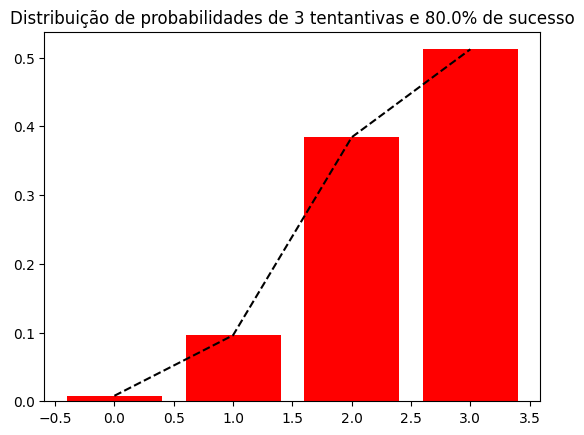

In [95]:
plt.bar(df_probabilidade['sucesso'],
        df_probabilidade['probabilidade'], color='r')
plt.plot(df_probabilidade['sucesso'],
         df_probabilidade['probabilidade'], '--', color = 'black')
plt.title(f'Distribuição de probabilidades de {len(lista)} tentantivas e {p*100}% de sucesso')